In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join

In [2]:
if not os.path.exists("./figures"):
    os.makedirs("./figures")

### Train, val, test split distribution

In [3]:
def count_files(folder_path):
    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

train_path = "landcover.ai.v1/train/image"
val_path = "landcover.ai.v1/val/image"
test_path = "landcover.ai.v1/test/image"

train_file_count = count_files(train_path)
val_file_count = count_files(val_path)
test_file_count = count_files(test_path)

train_file_count, val_file_count, test_file_count

(7470, 1602, 1602)

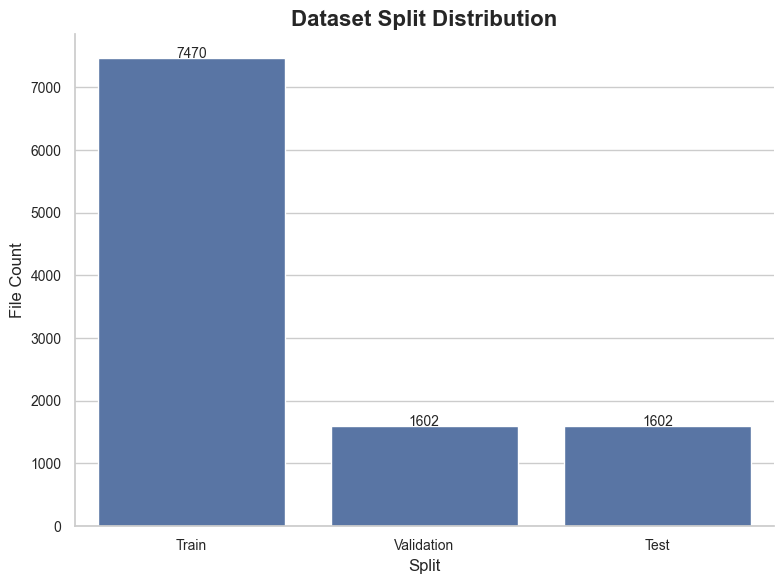

In [4]:
data = {
    'split': ['Train', 'Validation', 'Test'],
    'filecount': [train_file_count, val_file_count, test_file_count]
}

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='split', y='filecount', data=data, ax=ax)

ax.set_title('Dataset Split Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Split', fontsize=12)
ax.set_ylabel('File Count', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)

for i, v in enumerate(data['filecount']):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

fig.tight_layout()

plt.savefig('./figures/split_dist.png', dpi=300)
plt.show()

### Class distribution

In [5]:
train_path = "landcover.ai.v1/train/label"
val_path = "landcover.ai.v1/val/label"
test_path = "landcover.ai.v1/test/label"

train_files = [join(train_path, f) for f in listdir(train_path) if isfile(join(train_path, f))]
val_files = [join(val_path, f) for f in listdir(val_path) if isfile(join(val_path, f))]
test_files = [join(test_path, f) for f in listdir(test_path) if isfile(join(test_path, f))]

train_classes_count = {}
for f in train_files:
    img = Image.open(f).convert('RGB')
    data_img = np.asarray(img)
    uniques = np.unique(data_img.reshape(-1, data_img.shape[-1]), axis=0)
    for u in uniques:
        train_classes_count[tuple(u)] = 1 + train_classes_count.get(tuple(u), 0)
print("train classes count")
print(train_classes_count)

val_classes_count = {}
for f in val_files:
    img = Image.open(f).convert('RGB')
    data_img = np.asarray(img)
    uniques = np.unique(data_img.reshape(-1, data_img.shape[-1]), axis=0)
    for u in uniques:
        val_classes_count[tuple(u)] = 1 + val_classes_count.get(tuple(u), 0)
print("val classes count")
print(val_classes_count)

test_classes_count = {}
for f in test_files:
    img = Image.open(f).convert('RGB')
    data_img = np.asarray(img)
    uniques = np.unique(data_img.reshape(-1, data_img.shape[-1]), axis=0)
    for u in uniques:
        test_classes_count[tuple(u)] = 1 + test_classes_count.get(tuple(u), 0)
print("test classes count")
print(test_classes_count)

train classes count
{(0, 0, 0): 6831, (2, 2, 2): 5510, (4, 4, 4): 2786, (3, 3, 3): 1537, (1, 1, 1): 1196}
val classes count
{(0, 0, 0): 1480, (2, 2, 2): 1172, (4, 4, 4): 596, (3, 3, 3): 318, (1, 1, 1): 273}
test classes count
{(2, 2, 2): 1193, (0, 0, 0): 1457, (4, 4, 4): 639, (3, 3, 3): 334, (1, 1, 1): 263}


In [6]:
total_classes_count = {
    "Background": train_classes_count[(0, 0, 0)] + val_classes_count[(0, 0, 0)] + test_classes_count[(0, 0, 0)],
    "Buildings": train_classes_count[(1, 1, 1)] + val_classes_count[(1, 1, 1)] + test_classes_count[(1, 1, 1)],
    "Woodlands": train_classes_count[(2, 2, 2)] + val_classes_count[(2, 2, 2)] + test_classes_count[(2, 2, 2)],
    "Water": train_classes_count[(3, 3, 3)] + val_classes_count[(3, 3, 3)] + test_classes_count[(3, 3, 3)],
    "Roads": train_classes_count[(4, 4, 4)] + val_classes_count[(4, 4, 4)] + test_classes_count[(4, 4, 4)],
}

print(total_classes_count)

{'Background': 9768, 'Buildings': 1732, 'Woodlands': 7875, 'Water': 2189, 'Roads': 4021}


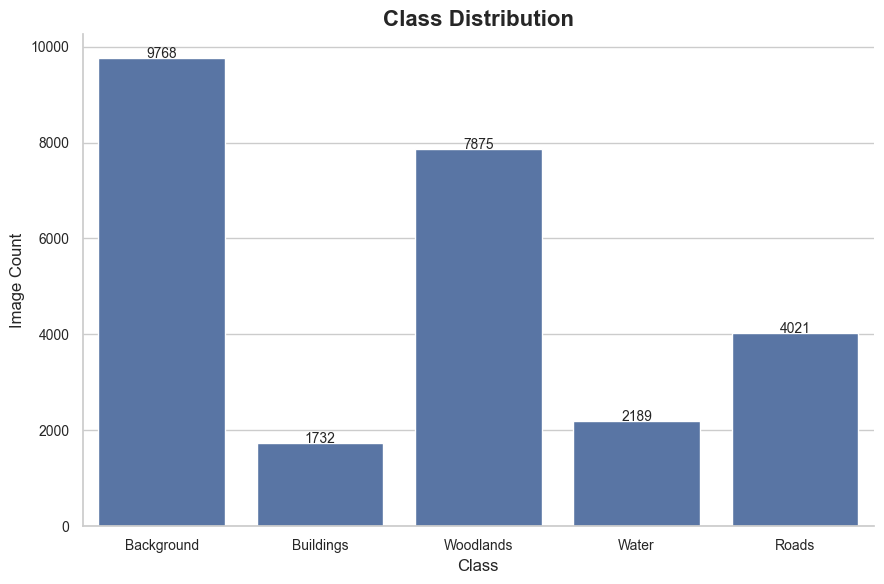

In [7]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(9, 6))

data = {"class": total_classes_count.keys(), "count": total_classes_count.values()}
sns.barplot(x='class', y='count', data=data, ax=ax)

ax.set_title('Class Distribution', fontsize=16, fontweight='bold')
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Image Count', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)

for i, v in enumerate(data['count']):
    ax.text(i, v + 0.5, str(v), ha='center', fontsize=10)

fig.tight_layout()

plt.savefig('./figures/total_class_dist.png', dpi=300)
plt.show()

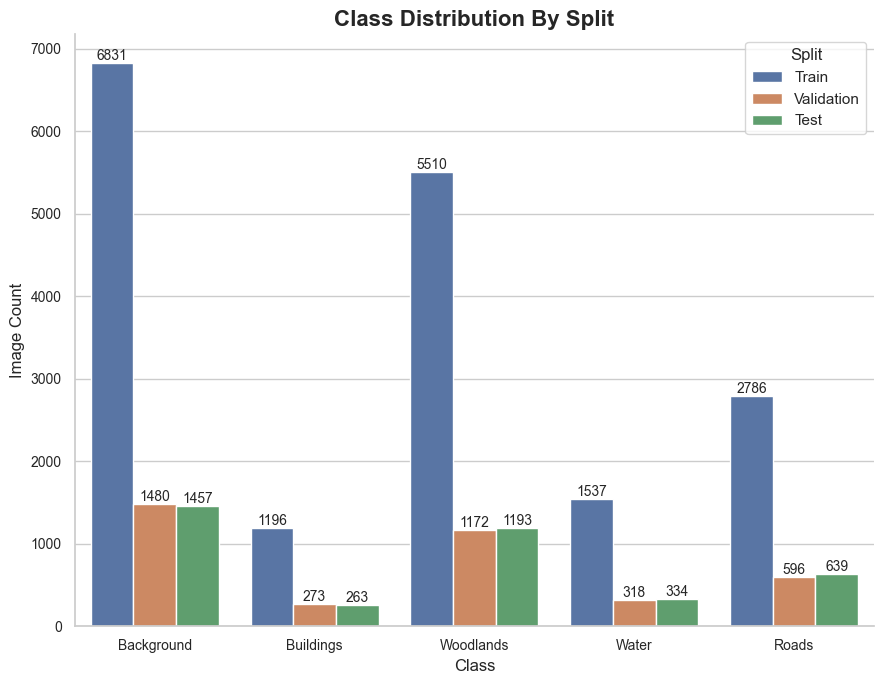

In [8]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(9, 7))

data = {
    "class": [
        "Background",
        "Buildings",
        "Woodlands",
        "Water",
        "Roads",
        "Background",
        "Buildings",
        "Woodlands",
        "Water",
        "Roads",
        "Background",
        "Buildings",
        "Woodlands",
        "Water",
        "Roads",
    ], 
    "split": [
        "Train",
        "Train",
        "Train",
        "Train",
        "Train",
        "Validation",
        "Validation",
        "Validation",
        "Validation",
        "Validation",
        "Test",
        "Test",
        "Test",
        "Test",
        "Test",
    ],
    "count": [
        train_classes_count[(0, 0, 0)],
        train_classes_count[(1, 1, 1)],
        train_classes_count[(2, 2, 2)],
        train_classes_count[(3, 3, 3)],
        train_classes_count[(4, 4, 4)],
        val_classes_count[(0, 0, 0)],
        val_classes_count[(1, 1, 1)],
        val_classes_count[(2, 2, 2)],
        val_classes_count[(3, 3, 3)],
        val_classes_count[(4, 4, 4)],
        test_classes_count[(0, 0, 0)],
        test_classes_count[(1, 1, 1)],
        test_classes_count[(2, 2, 2)],
        test_classes_count[(3, 3, 3)],
        test_classes_count[(4, 4, 4)],
    ]
}
sns.barplot(x='class', y='count', hue="split", data=data, ax=ax)

ax.set_title('Class Distribution By Split', fontsize=16, fontweight='bold')
ax.set_xlabel('Class', fontsize=12)
ax.set_ylabel('Image Count', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', labelsize=10)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
ax.bar_label(ax.containers[2], fontsize=10)

plt.legend(title='Split')
fig.tight_layout()

plt.savefig('./figures/split_class_dist.png', dpi=300)
plt.show()

### Visualizing samples and masks

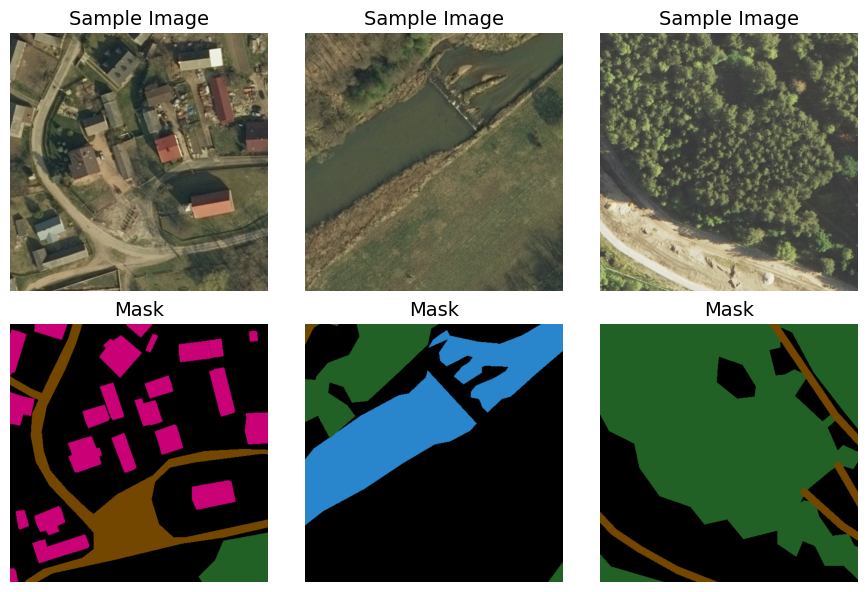

In [9]:
files = ["M-33-7-A-d-3-2_123", "M-33-7-A-d-3-2_208", "M-33-20-D-c-4-2_49"]

num_samples = len(files)
fig, axes = plt.subplots(2, num_samples, figsize=(3 * num_samples, 6))

for i, f in enumerate(files):
    image = Image.open(f"landcover.ai.v1/train/image/{f}.tif")
    mask = Image.open(f"landcover.ai.v1/train/label/{f}.tif")
    
    image_array = np.array(image)
    mask_array = np.array(mask)

    axes[0, i].set_title('Sample Image', fontsize=14)
    axes[1, i].set_title('Mask', fontsize=14)

    axes[0, i].imshow(image_array)
    axes[0, i].axis('off')

    building = (1,1,1)
    wood = (2,2,2)
    water = (3,3,3)
    road = (4,4,4)

    nbuilding = (201,0,118)
    nwood = (34,97,38)
    nwater = (41,134,204)
    nroad = (116,71,0)
    
    mask_array[(mask_array == building).all(axis = -1)] = nbuilding
    mask_array[(mask_array == wood).all(axis = -1)] = nwood
    mask_array[(mask_array == water).all(axis = -1)] = nwater
    mask_array[(mask_array == road).all(axis = -1)] = nroad
    # img2 = Image.fromarray(data, mode='RGB')
    # img2.show()
    
    axes[1, i].imshow(mask_array)
    axes[1, i].axis('off')


plt.tight_layout()

plt.savefig('./figures/sample_mask_viz.png', dpi=300)
plt.show()

### Visualizing data augmentations

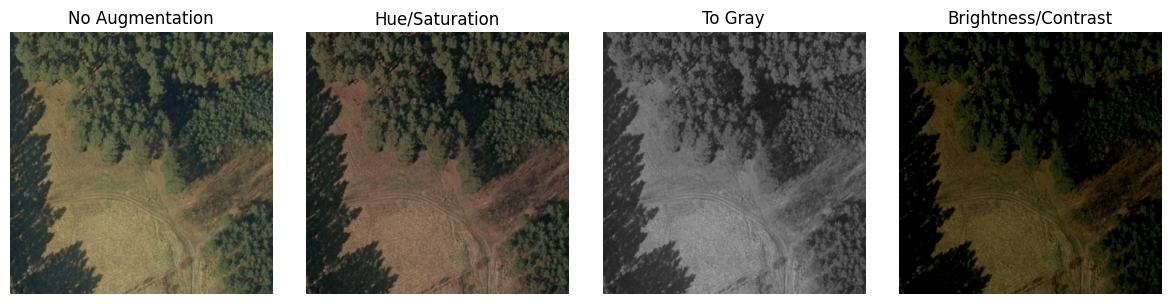

In [3]:
f = "M-33-7-A-d-2-3_247"

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

image = Image.open(f"landcover.ai.v1/train/image/{f}.tif")
hflip = Image.open(f"landcover.ai.v1/augmented/image/{f}_hflip.tif")
vflip = Image.open(f"landcover.ai.v1/augmented/image/{f}_vflip.tif")
hue = Image.open(f"landcover.ai.v1/augmented/image/{f}_hue.tif")
gray = Image.open(f"landcover.ai.v1/augmented/image/{f}_gray.tif")
bright = Image.open(f"landcover.ai.v1/augmented/image/{f}_bright.tif")

axes[0].imshow(np.array(image))
axes[0].axis('off')
axes[0].set_title('No Augmentation', fontsize=12)

# axes[0, 1].imshow(np.array(hflip))
# axes[0, 1].axis('off')
# axes[0, 1].set_title('Horizontal Flip', fontsize=12)

# axes[0, 2].imshow(np.array(vflip))
# axes[0, 2].axis('off')
# axes[0, 2].set_title('Vertical Flip', fontsize=12)

axes[1].imshow(np.array(hue))
axes[1].axis('off')
axes[1].set_title('Hue/Saturation', fontsize=12)

axes[2].imshow(np.array(gray))
axes[2].axis('off')
axes[2].set_title('To Gray', fontsize=12)

axes[3].imshow(np.array(bright))
axes[3].axis('off')
axes[3].set_title('Brightness/Contrast', fontsize=12)

plt.tight_layout()

plt.savefig('./figures/augmentations_viz.png', dpi=300)
plt.show()

### Class viz

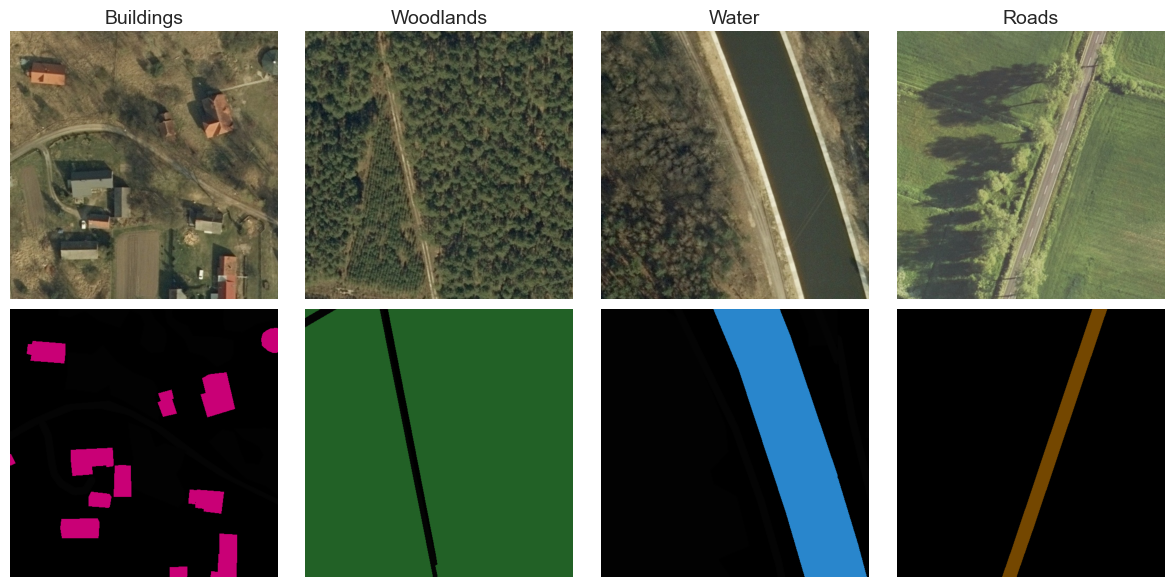

In [9]:
files = ["M-33-7-A-d-3-2_106", "M-33-7-A-d-2-3_22", "M-33-7-A-d-3-2_148", "M-33-20-D-d-3-3_28"]
num_samples = len(files)

fig, axes = plt.subplots(2, num_samples, figsize=(3 * num_samples, 6))

for i, f in enumerate(files):
    building = (1,1,1)
    wood = (2,2,2)
    water = (3,3,3)
    road = (4,4,4)

    nbuilding = (201,0,118)
    nwood = (34,97,38)
    nwater = (41,134,204)
    nroad = (116,71,0)
    
    image = Image.open(f"landcover.ai.v1/train/image/{f}.tif")
    mask = Image.open(f"landcover.ai.v1/train/label/{f}.tif")
    
    image_array = np.array(image)

    axes[0, i].imshow(image_array)
    axes[0, i].axis('off')

    mask_array = np.array(mask)

    if i == 0:
        mask_array[(mask_array == building).all(axis = -1)] = nbuilding
    if i == 1:
        mask_array[(mask_array == wood).all(axis = -1)] = nwood
    if i == 2:
        mask_array[(mask_array == water).all(axis = -1)] = nwater
    if i == 3:
        mask_array[(mask_array == road).all(axis = -1)] = nroad

    axes[1, i].imshow(mask_array)
    axes[1, i].axis('off')
    
axes[0, 0].set_title('Buildings', fontsize=14)
axes[0, 1].set_title('Woodlands', fontsize=14)
axes[0, 2].set_title('Water', fontsize=14)
axes[0, 3].set_title('Roads', fontsize=14)

plt.tight_layout()

plt.savefig('./figures/class_viz.png', dpi=300)
plt.show()